In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/phishing_email.csv")

# Show first 5 rows
df.head()


,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


In [3]:
df['label'].value_counts()


label
1    42891
0    39595
Name: count, dtype: int64

In [4]:
df['label'].value_counts()


label
1    42891
0    39595
Name: count, dtype: int64

In [5]:
df.isnull().sum()


text_combined    0
label            0
dtype: int64

In [6]:
import re

def clean_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special characters & numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

# Apply cleaning
df['cleaned_text'] = df['text_combined'].apply(clean_text)

# Show sample
df[['text_combined', 'cleaned_text']].head()


,text_combined,cleaned_text
0,hpl nom may 25 2001 see attached file hplno 52...,hpl nom may see attached file hplno xls hplno xls
1,nom actual vols 24 th forwarded sabrae zajac h...,nom actual vols th forwarded sabrae zajac hou ...
2,enron actuals march 30 april 1 201 estimated a...,enron actuals march april estimated actuals ma...
3,hpl nom may 30 2001 see attached file hplno 53...,hpl nom may see attached file hplno xls hplno xls
4,hpl nom june 1 2001 see attached file hplno 60...,hpl nom june see attached file hplno xls hplno...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=5000)

# Convert text to numerical features
X = tfidf.fit_transform(df['cleaned_text'])

# Labels
y = df['label']

print("Feature matrix shape:", X.shape)


Feature matrix shape: (82486, 5000)


In [8]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (65988, 5000)
Testing shape: (16498, 5000)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9814522972481513

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7935
           1       0.98      0.99      0.98      8563

    accuracy                           0.98     16498
   macro avg       0.98      0.98      0.98     16498
weighted avg       0.98      0.98      0.98     16498



In [10]:
import pickle

with open("../models/email_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("../models/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


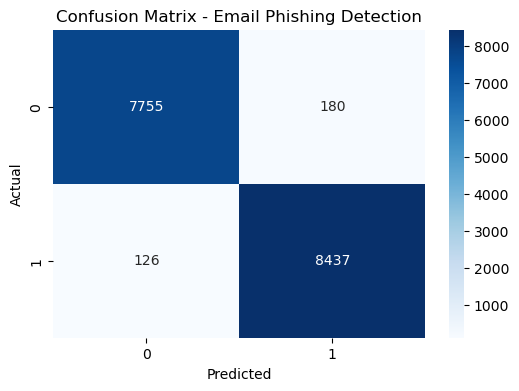

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Email Phishing Detection")

plt.show()
